# Florida Course Enrollment
## School-level analysis

The source data can be found on the [FLDOE Publications and Reports page](http://www.fldoe.org/accountability/data-sys/edu-info-accountability-services/pk-12-public-school-data-pubs-reports/students.stml):
- Course Enrollment by School, Survey 3 2015-16 (5 .xls files)
- High School Completers, by school (.xls file)

The [FL Course Code Directory](http://www.fldoe.org/core/fileparse.php/7746/urlt/1617CCD-Basic9-12.pdf) lists each course, its numeric code, as well as credit and certification information.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# pull enrollment data
# created with FL_Science_datagen.ipynb
completers_orig = pd.read_csv('completers.csv', index_col=0)
takers_orig = pd.read_csv('takers.csv', index_col=0)

In [3]:
# select a District
completers = completers_orig.query('DISTRICT == "VOLUSIA"')
takers = takers_orig.query('DISTRICT == "VOLUSIA"')

## Collect data

In [4]:
# Physics 1, Physics 1 Hon, and AP Physics 1
takersPHY1 = takers.query('COURSE_NUM == "2003380" \
    or COURSE_NUM == "2003390" \
    or COURSE_NUM == "2003421"').groupby("SITE").TAKERS.sum()
PHY1 = pd.DataFrame()
PHY1['SITE'] = takersPHY1.index
PHY1['PHY1_TAKERS'] = takersPHY1.values

# Chemistry 1 and Chemistry 1 Hon
takersCHEM1 = takers.query('COURSE_NUM == "2003340" \
    or COURSE_NUM == "2003350"').groupby("SITE").TAKERS.sum()
CHEM1 = pd.DataFrame()
CHEM1['SITE'] = takersCHEM1.index
CHEM1['CHEM1_TAKERS'] = takersCHEM1.values

# Earth/Space 1 and Earth/Space 1 Hon
takersES = takers.query('COURSE_NUM == "2001310" \
    or COURSE_NUM == "2001320"').groupby("SITE").TAKERS.sum()
ES = pd.DataFrame()
ES['SITE'] = takersES.index
ES['ES_TAKERS'] = takersES.values

# Physical Science 1 and Physical Science 1 Hon
takersPS = takers.query('COURSE_NUM == "2003310" \
    or COURSE_NUM == "2003320"').groupby("SITE").TAKERS.sum()
PS = pd.DataFrame()
PS['SITE'] = takersPS.index
PS['PS_TAKERS'] = takersPS.values

df = completers.merge(PHY1, on="SITE", how='left')
df = df.merge(CHEM1, on="SITE", how='left')
df = df.merge(ES, on="SITE", how='left')
df = df.merge(PS, on="SITE", how='left')

df['PCT_PHY1_TAKERS'] = df.PHY1_TAKERS/df.COMPLETERS
df['PCT_CHEM1_TAKERS'] = df.CHEM1_TAKERS/df.COMPLETERS
df['PCT_ES_TAKERS'] = df.ES_TAKERS/df.COMPLETERS
df['PCT_PS_TAKERS'] = df.PS_TAKERS/df.COMPLETERS

df1 = df.fillna(0, inplace=False)
df = df1.sort_values(by="SCHOOL_NAME", ascending=True)

## Plot course enrollment, by District

In [5]:
df[['SCHOOL_NAME','PCT_PS_TAKERS', 'PCT_ES_TAKERS', 'PCT_CHEM1_TAKERS', 'PCT_PHY1_TAKERS']]

,SCHOOL_NAME,PCT_PS_TAKERS,PCT_ES_TAKERS,PCT_CHEM1_TAKERS,PCT_PHY1_TAKERS
5,ATLANTIC HIGH SCHOOL,0.000000,1.185930,0.361809,0.055276
0,DELAND HIGH SCHOOL,0.000000,1.049505,0.574257,0.138614
8,DELTONA HIGH SCHOOL,0.000000,0.756098,0.859756,0.274390
2,MAINLAND HIGH SCHOOL,0.473846,0.083077,0.796923,0.436923
3,NEW SMYRNA BEACH HIGH SCHOOL,0.034301,0.868074,0.680739,0.047493
9,PINE RIDGE HIGH SCHOOL,0.035948,1.150327,0.359477,0.078431
10,RICHARD MILBURN ACADEMY,2.857143,3.523810,0.000000,0.000000
6,SEABREEZE HIGH SCHOOL,0.000000,0.659942,0.740634,0.221902
4,SPRUCE CREEK HIGH SCHOOL,0.042301,0.549915,0.441624,0.069374
7,T. DEWITT TAYLOR MIDDLE-HIGH SCHOOL,0.000000,1.455357,0.642857,0.000000


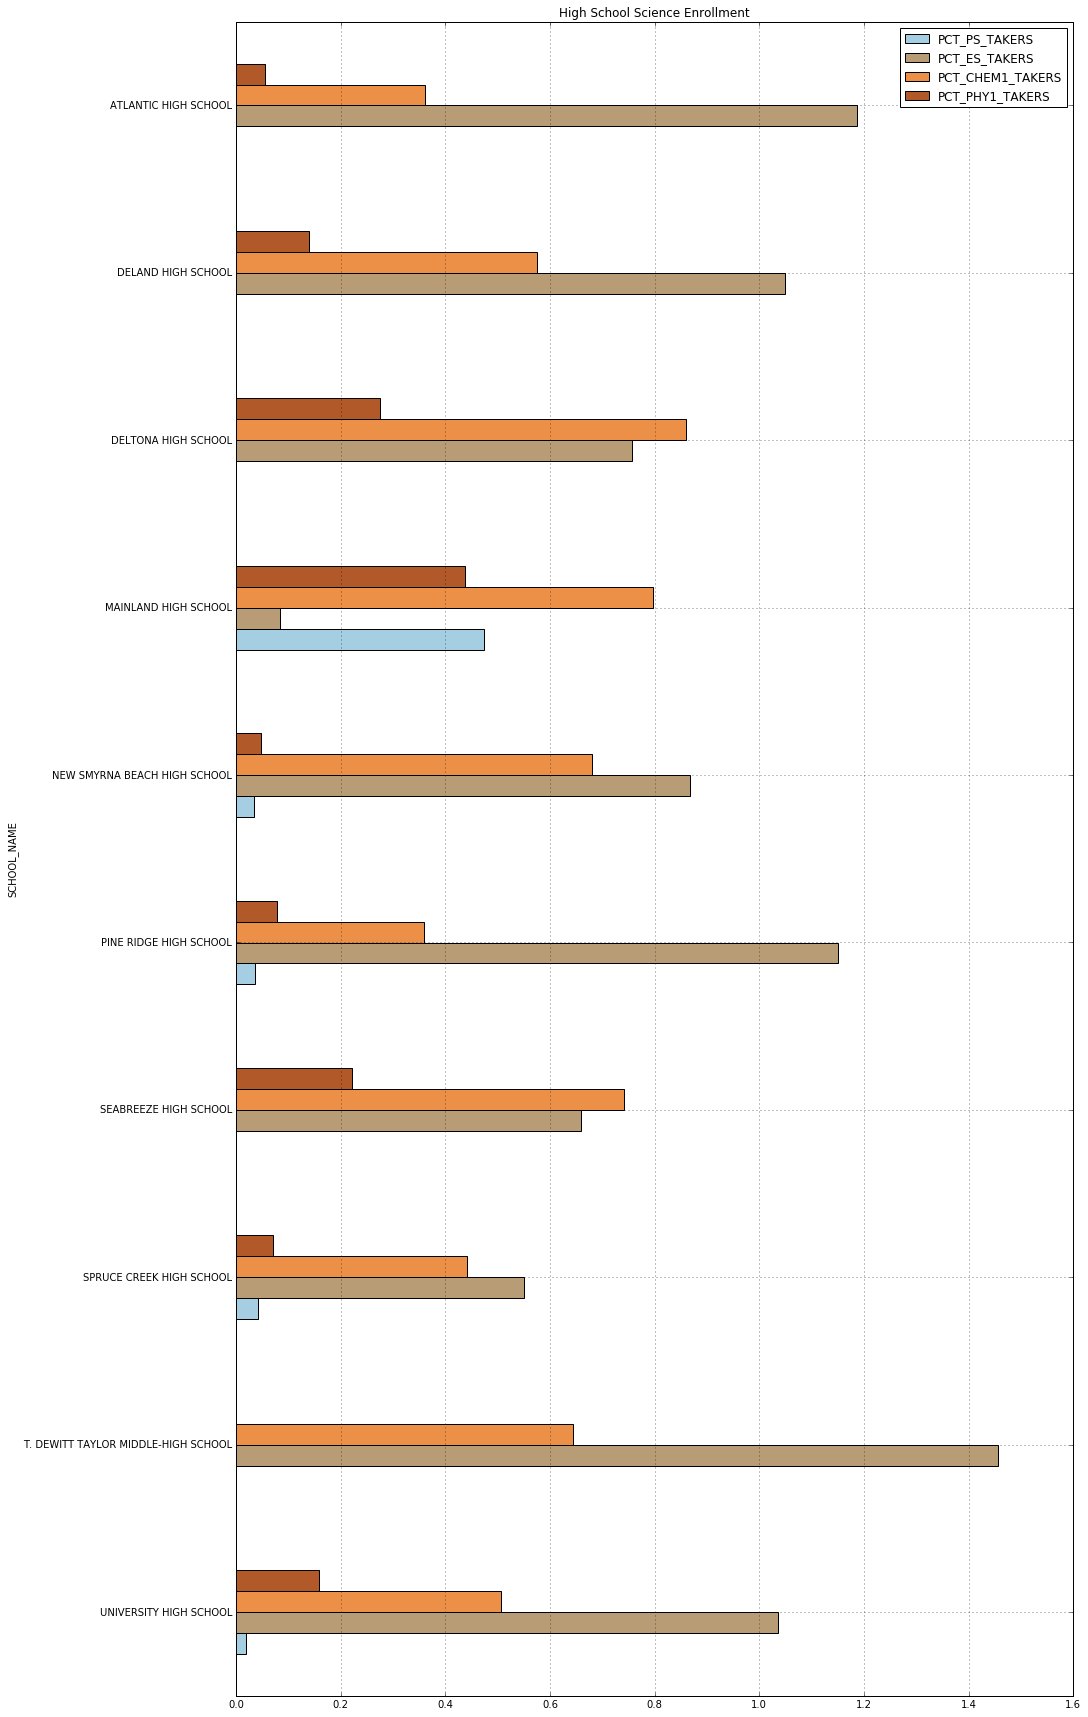

In [7]:
df = df.sort_values(by="SCHOOL_NAME", ascending=False)
df = df[df.SCHOOL_NAME.str.contains("VIRTUAL") == False] # Drop a school from the set
df = df[df.SCHOOL_NAME.str.contains("CHARTER") == False] # Drop a school from the set
df = df[df.SCHOOL_NAME.str.contains("MILBURN") == False] # Drop a school from the set

plotdata = df[['SCHOOL_NAME','PCT_PS_TAKERS', 'PCT_ES_TAKERS', 'PCT_CHEM1_TAKERS', 'PCT_PHY1_TAKERS']]
plotdata.plot(x=df.SCHOOL_NAME, kind='barh', title="High School Science Enrollment", figsize=(15,30), grid=True, legend=True, colormap='Paired')

## Next up ...
- better colors for bar chart; use gradual progression for ES -> CHEM -> PHY?
- display as %
- include target % in legend, and as line?
- get same-year data
- this is too much on a single graph
- generate plot for each district and save image, use groupby "DISTRICT"?